In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

In [ ]:
# CARGAR LOS DATOS 
print("🔄 CARGANDO DATASET...")
df = pd.read_csv('../data/raw/Worldwide Travel Cities Dataset (Ratings and Climate).csv')
print(f"✅ Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")

def clean_data_duration(df):
    """Limpia y convierte la columna ideal_durations a formato numérico"""
    if 'ideal_durations' in df.columns:
        # Mapeo de duraciones a días
        duration_map = {
            'Day trip': 1,
            'Weekend': 2,
            'Short trip': 4,
            'One week': 7,
            'Long trip': 14
        }
        
        def process_duration(value):
            if pd.isna(value) or value == '':
                return np.nan
            
            # Si es string, intentar parsearlo
            if isinstance(value, str):
                try:
                    # Remover caracteres problemáticos y dividir
                    clean_value = value.replace('[', '').replace(']', '').replace('"', '')
                    durations = [d.strip() for d in clean_value.split(',') if d.strip()]
                    
                    # Convertir cada duración a días y promediar
                    days = [duration_map.get(dur, 7) for dur in durations if dur in duration_map]
                    return np.mean(days) if days else 7
                except:
                    return 7  # valor por defecto
            
            # Si ya es numérico, dejarlo así
            return float(value) if not pd.isna(value) else 7
        
        df_copy = df.copy()
        df_copy['ideal_durations'] = df_copy['ideal_durations'].apply(process_duration)
        print(f"Columna ideal_durations limpiada: {df['ideal_durations'].dtype}")
    
    return df

df = clean_data_duration(df)

🔄 CARGANDO DATASET...
✅ Dataset cargado: 560 filas, 19 columnas
Columna ideal_durations limpiada: float64


In [14]:
# Preparar datos
activity_columns = ['culture', 'adventure', 'nature', 'beaches', 'nightlife', 
                   'cuisine', 'wellness', 'urban', 'seclusion']
existing_activities = [col for col in activity_columns if col in df.columns]

if existing_activities and 'avg_activity_rating' not in df.columns:
    df['avg_activity_rating'] = df[existing_activities].mean(axis=1)

EJECUTANDO DASHBOARD COMPLETO...
INICIANDO DASHBOARD EJECUTIVO COMPLETO
CREANDO DASHBOARD EJECUTIVO


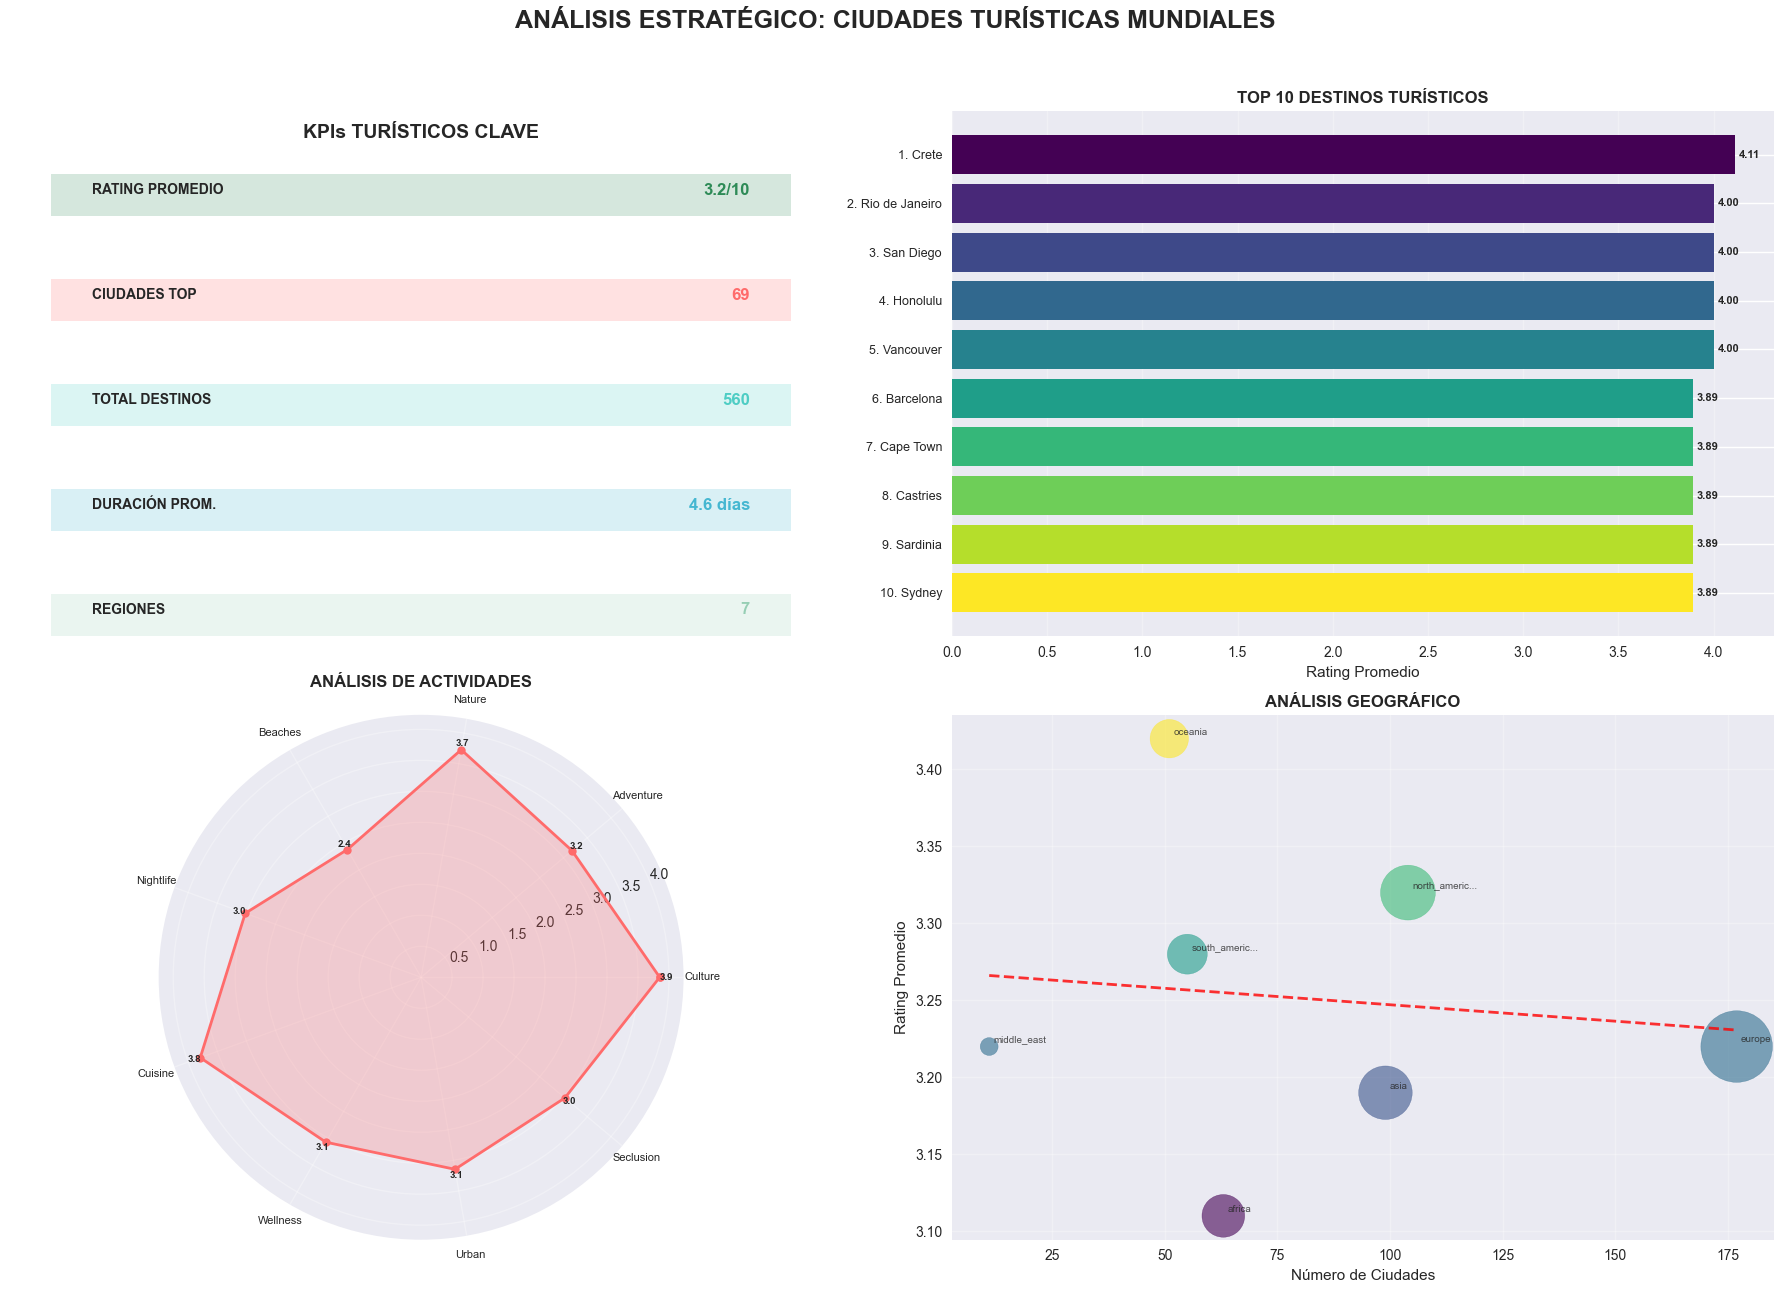


ANÁLISIS DE SEGMENTACIÓN TURÍSTICA


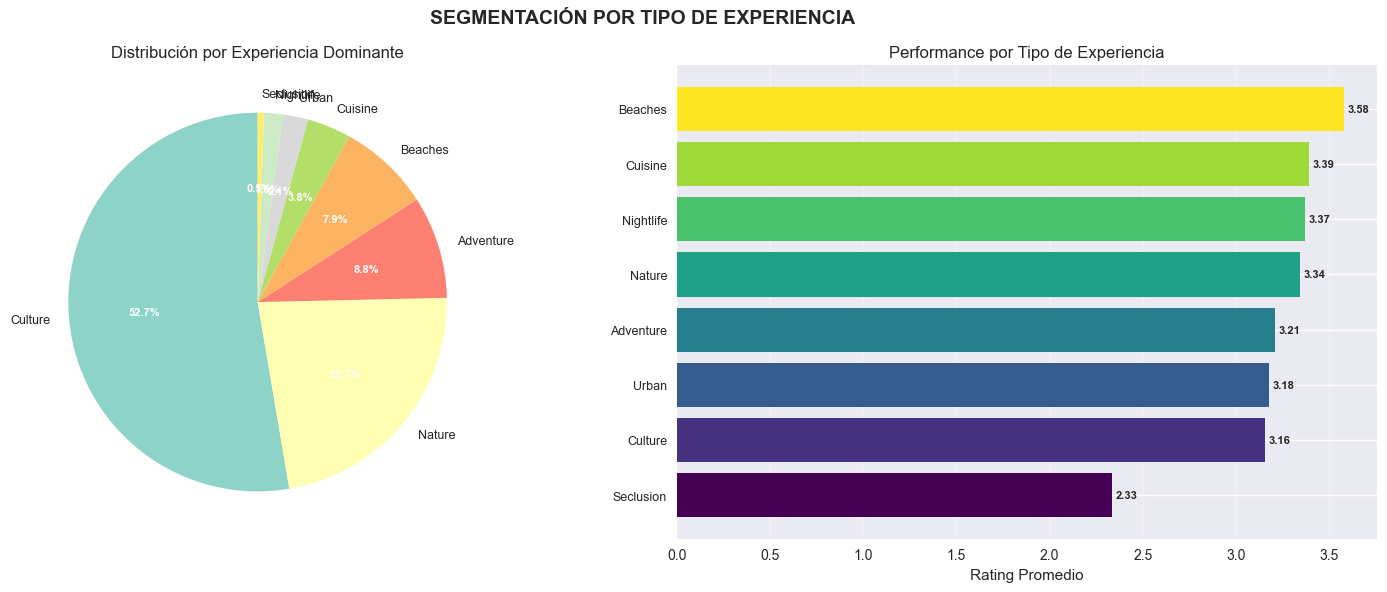


ESTADÍSTICAS POR SEGMENTO:
• Culture: 295 ciudades (52.7%) - Rating: 3.16
• Nature: 127 ciudades (22.7%) - Rating: 3.34
• Adventure: 49 ciudades (8.8%) - Rating: 3.21
• Beaches: 44 ciudades (7.9%) - Rating: 3.58
• Cuisine: 21 ciudades (3.8%) - Rating: 3.39
• Urban: 12 ciudades (2.1%) - Rating: 3.18
• Nightlife: 9 ciudades (1.6%) - Rating: 3.37
• Seclusion: 3 ciudades (0.5%) - Rating: 2.33

RECOMENDACIONES ESTRATÉGICAS

PLAN DE ACCIÓN:

1. OPORTUNIDADES DE CRECIMIENTO
   Hallazgo: Ciudades con alto rating pero estancia corta: Annecy, Piran, Rotorua
   Acción: Desarrollar paquetes de estadía extendida

2. FORTALEZAS
   Hallazgo: Mejor actividad: culture (3.85)
   Acción: Potenciar y promocionar esta experiencia

3. ÁREAS DE MEJORA
   Hallazgo: Actividad con menor rating: beaches (2.38)
   Acción: Invertir en mejoras e innovación

4. ESTRATEGIA GEOGRÁFICA
   Hallazgo: Región líder: oceania (3.42)
   Acción: Replicar mejores prácticas en otras regiones

INFORME EJECUTIVO FINAL

RESUMEN DE

In [ ]:
# ========================================
# FUNCIONES DEL DASHBOARD
# ========================================

def create_kpis_panel(df, ax):
    """Panel de KPIs principales"""
    ax.axis('off')
    
    # Calcular KPIs con validaciones robustas
    kpis = []
    
    # KPI 1: Rating promedio
    if 'avg_activity_rating' in df.columns:
        try:
            df['avg_activity_rating'] = pd.to_numeric(df['avg_activity_rating'], errors='coerce')
            avg_rating = df['avg_activity_rating'].mean()
            if not pd.isna(avg_rating):
                kpis.append(("RATING PROMEDIO", f"{avg_rating:.1f}/10", "#2E8B57"))
                
                # Top cities basado en cuantil
                top_cities = len(df[df['avg_activity_rating'] >= df['avg_activity_rating'].quantile(0.9)])
                kpis.append(("CIUDADES TOP", f"{top_cities}", "#FF6B6B"))
        except Exception as e:
            print(f"Error procesando avg_activity_rating: {e}")
    
    # KPI 2: Total destinos (siempre funciona)
    kpis.append(("TOTAL DESTINOS", f"{len(df)}", "#4ECDC4"))
    
    # KPI 3: Duración promedio (con validación mejorada)
    if 'ideal_durations' in df.columns:
        try:
            # Intentar conversión numérica directa primero
            df['ideal_durations'] = pd.to_numeric(df['ideal_durations'], errors='coerce')
            valid_durations = df['ideal_durations'].dropna()
            
            if len(valid_durations) > 0:
                avg_duration = valid_durations.mean()
                kpis.append(("DURACIÓN PROM.", f"{avg_duration:.1f} días", "#45B7D1"))
            else:
                kpis.append(("DURACIÓN PROM.", "N/A", "#45B7D1"))
        except Exception as e:
            print(f"Error procesando ideal_durations: {e}")
            kpis.append(("DURACIÓN PROM.", "N/A", "#45B7D1"))
    
    # KPI 4: Número de regiones
    if 'region' in df.columns:
        try:
            n_regions = df['region'].nunique()
            kpis.append(("REGIONES", f"{n_regions}", "#96CEB4"))
        except Exception as e:
            print(f"Error procesando region: {e}")
    
    # KPI 5: Temperatura promedio (con validación)
    if 'avg_temp_monthly' in df.columns:
        try:
            df['avg_temp_monthly'] = pd.to_numeric(df['avg_temp_monthly'], errors='coerce')
            valid_temps = df['avg_temp_monthly'].dropna()
            
            if len(valid_temps) > 0:
                avg_temp = valid_temps.mean()
                kpis.append(("TEMP. PROM.", f"{avg_temp:.1f}°C", "#FECA57"))
        except Exception as e:
            print(f"Error procesando avg_temp_monthly: {e}")
    
    # Visualizar KPIs
    ax.text(0.5, 0.95, 'KPIs TURÍSTICOS CLAVE', 
            transform=ax.transAxes, fontsize=14, fontweight='bold', ha='center')
    
    if kpis:  # Solo mostrar si hay KPIs válidos
        y_positions = np.linspace(0.85, 0.05, len(kpis))
        
        for i, (label, value, color) in enumerate(kpis):
            y_pos = y_positions[i]
            
            # Rectángulo de fondo
            rect = plt.Rectangle((0.05, y_pos-0.05), 0.9, 0.08, 
                               facecolor=color, alpha=0.2, transform=ax.transAxes)
            ax.add_patch(rect)
            
            # Textos
            ax.text(0.1, y_pos, label, transform=ax.transAxes, 
                    fontsize=10, fontweight='bold', va='center')
            ax.text(0.9, y_pos, value, transform=ax.transAxes, 
                    fontsize=12, fontweight='bold', va='center', ha='right', color=color)
    else:
        ax.text(0.5, 0.5, 'No hay KPIs disponibles', transform=ax.transAxes, ha='center')

def create_ranking_top_destinations(df, ax):
    """Ranking de mejores destinos"""
    ax.set_title('TOP 10 DESTINOS TURÍSTICOS', fontsize=12, fontweight='bold')
    
    if 'avg_activity_rating' in df.columns and 'city' in df.columns:
        top_10 = df.nlargest(10, 'avg_activity_rating')
        
        colors = plt.cm.viridis(np.linspace(0, 1, len(top_10)))
        bars = ax.barh(range(len(top_10)), top_10['avg_activity_rating'], color=colors)
        
        # Etiquetas
        city_labels = [f"{i+1}. {city[:15]}" for i, city in enumerate(top_10['city'])]
        ax.set_yticks(range(len(top_10)))
        ax.set_yticklabels(city_labels, fontsize=9)
        ax.invert_yaxis()
        
        # Valores en barras
        for i, (bar, rating) in enumerate(zip(bars, top_10['avg_activity_rating'])):
            ax.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, 
                   f'{rating:.2f}', va='center', fontsize=8, fontweight='bold')
        
        ax.set_xlabel('Rating Promedio')
        ax.grid(True, alpha=0.3, axis='x')
    else:
        ax.text(0.5, 0.5, 'Datos no disponibles', transform=ax.transAxes, ha='center')

def create_activities_analysis(df, ax):
    """Análisis radar de actividades"""
    if not existing_activities:
        ax.text(0.5, 0.5, 'Datos de actividades no disponibles', 
                transform=ax.transAxes, ha='center', va='center')
        return
    
    # Convertir a coordenadas polares
    ax.remove()
    ax = plt.subplot(2, 2, 3, projection='polar')
    
    # Promedios por actividad
    activity_means = [df[col].mean() for col in existing_activities]
    activity_labels = [col.capitalize() for col in existing_activities]
    
    # Cerrar el polígono
    angles = np.linspace(0, 2*np.pi, len(existing_activities), endpoint=False).tolist()
    activity_means += activity_means[:1]
    angles += angles[:1]
    
    # Gráfico radar
    ax.plot(angles, activity_means, 'o-', linewidth=2, color='#FF6B6B', markersize=6)
    ax.fill(angles, activity_means, alpha=0.25, color='#FF6B6B')
    
    # Etiquetas y configuración
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(activity_labels, fontsize=8)
    ax.set_ylim(0, max(activity_means) * 1.1 if activity_means else 10)
    ax.set_title('ANÁLISIS DE ACTIVIDADES', fontsize=12, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3)
    
    # Añadir valores
    for angle, mean in zip(angles[:-1], activity_means[:-1]):
        ax.text(angle, mean + 0.1, f'{mean:.1f}', 
               ha='center', va='center', fontsize=7, fontweight='bold')

def create_geographic_analysis(df, ax):
    """Análisis geográfico"""
    ax.set_title('ANÁLISIS GEOGRÁFICO', fontsize=12, fontweight='bold')
    
    if 'region' in df.columns and 'avg_activity_rating' in df.columns:
        # Estadísticas por región (top 10)
        region_stats = df.groupby('region').agg({
            'avg_activity_rating': 'mean',
            'city': 'count'
        }).round(2)
        region_stats.columns = ['Rating_Promedio', 'Num_Ciudades']
        
        # Filtrar regiones con más de 1 ciudad y tomar top 10
        region_stats = region_stats[region_stats['Num_Ciudades'] > 0]
        top_regions = region_stats.nlargest(10, 'Num_Ciudades')
        
        if len(top_regions) > 0:
            # Scatter plot
            scatter = ax.scatter(top_regions['Num_Ciudades'], 
                               top_regions['Rating_Promedio'],
                               s=top_regions['Num_Ciudades'] * 15,
                               alpha=0.6, 
                               c=top_regions['Rating_Promedio'], 
                               cmap='viridis')
            
            # Etiquetas de regiones
            for region, row in top_regions.iterrows():
                region_name = region[:12] + ('...' if len(region) > 12 else '')
                ax.annotate(region_name, 
                           (row['Num_Ciudades'], row['Rating_Promedio']),
                           xytext=(3, 3), textcoords='offset points', 
                           fontsize=7, alpha=0.8)
            
            ax.set_xlabel('Número de Ciudades')
            ax.set_ylabel('Rating Promedio')
            ax.grid(True, alpha=0.3)
            
            # Línea de tendencia
            if len(top_regions) > 1:
                try:
                    z = np.polyfit(top_regions['Num_Ciudades'], top_regions['Rating_Promedio'], 1)
                    p = np.poly1d(z)
                    x_line = np.linspace(top_regions['Num_Ciudades'].min(), 
                                       top_regions['Num_Ciudades'].max(), 100)
                    ax.plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2)
                except:
                    pass
        else:
            ax.text(0.5, 0.5, 'Insuficientes datos regionales', 
                   transform=ax.transAxes, ha='center', va='center')
    
    elif 'country' in df.columns and 'avg_activity_rating' in df.columns:
        # Análisis por país como alternativa
        country_stats = df.groupby('country')['avg_activity_rating'].mean().sort_values(ascending=True).tail(8)
        
        bars = ax.barh(range(len(country_stats)), country_stats.values,
                       color=plt.cm.viridis(np.linspace(0, 1, len(country_stats))))
        
        ax.set_yticks(range(len(country_stats)))
        country_labels = [country[:15] + ('...' if len(country) > 15 else '') 
                         for country in country_stats.index]
        ax.set_yticklabels(country_labels, fontsize=8)
        ax.set_xlabel('Rating Promedio')
        ax.grid(True, alpha=0.3, axis='x')
        
        for i, (bar, rating) in enumerate(zip(bars, country_stats.values)):
            ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                   f'{rating:.2f}', va='center', fontsize=8)
    else:
        ax.text(0.5, 0.5, 'Datos geográficos no disponibles', 
                transform=ax.transAxes, ha='center', va='center')

def create_main_dashboard(df):
    """Dashboard principal con 4 paneles"""
    print("="*60)
    print("CREANDO DASHBOARD EJECUTIVO")
    print("="*60)
    
    fig = plt.figure(figsize=(18, 14))
    fig.suptitle('ANÁLISIS ESTRATÉGICO: CIUDADES TURÍSTICAS MUNDIALES', 
                fontsize=18, fontweight='bold', y=0.95)
    
    # Panel 1: KPIs (superior izquierdo)
    ax1 = plt.subplot(2, 2, 1)
    create_kpis_panel(df, ax1)
    
    # Panel 2: Ranking (superior derecho)
    ax2 = plt.subplot(2, 2, 2)
    create_ranking_top_destinations(df, ax2)
    
    # Panel 3: Actividades (inferior izquierdo) - será reemplazado por polar
    ax3 = plt.subplot(2, 2, 3)
    create_activities_analysis(df, ax3)
    
    # Panel 4: Geográfico (inferior derecho)
    ax4 = plt.subplot(2, 2, 4)
    create_geographic_analysis(df, ax4)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.93])
    plt.show()

def segmentation_analysis(df):
    """Análisis de segmentación turística"""
    print("\nANÁLISIS DE SEGMENTACIÓN TURÍSTICA")
    print("="*50)
    
    if not existing_activities or len(existing_activities) < 3:
        print("Insuficientes datos para segmentación")
        return
    
    # Segmentación por actividad dominante
    df['actividad_dominante'] = df[existing_activities].idxmax(axis=1)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('SEGMENTACIÓN POR TIPO DE EXPERIENCIA', fontsize=14, fontweight='bold')
    
    # Distribución por segmentos
    segments = df['actividad_dominante'].value_counts()
    colors = plt.cm.Set3(np.linspace(0, 1, len(segments)))
    
    wedges, texts, autotexts = axes[0].pie(segments.values, 
                                          labels=[s.capitalize() for s in segments.index], 
                                          autopct='%1.1f%%', 
                                          colors=colors, 
                                          startangle=90)
    axes[0].set_title('Distribución por Experiencia Dominante')
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(8)
    
    for text in texts:
        text.set_fontsize(9)
    
    # Performance por segmento
    if 'avg_activity_rating' in df.columns:
        segment_rating = df.groupby('actividad_dominante')['avg_activity_rating'].mean().sort_values()
        
        bars = axes[1].barh(range(len(segment_rating)), segment_rating.values,
                           color=plt.cm.viridis(np.linspace(0, 1, len(segment_rating))))
        
        axes[1].set_yticks(range(len(segment_rating)))
        axes[1].set_yticklabels([s.capitalize() for s in segment_rating.index], fontsize=9)
        axes[1].set_xlabel('Rating Promedio')
        axes[1].set_title('Performance por Tipo de Experiencia')
        axes[1].grid(True, alpha=0.3, axis='x')
        
        for i, (bar, rating) in enumerate(zip(bars, segment_rating.values)):
            axes[1].text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, 
                        f'{rating:.2f}', va='center', fontweight='bold', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Estadísticas por segmento
    print("\nESTADÍSTICAS POR SEGMENTO:")
    for segment in segments.index:
        n_cities = segments[segment]
        pct = (n_cities / len(df)) * 100
        
        if 'avg_activity_rating' in df.columns:
            rating_seg = df[df['actividad_dominante'] == segment]['avg_activity_rating'].mean()
            print(f"• {segment.capitalize()}: {n_cities} ciudades ({pct:.1f}%) - Rating: {rating_seg:.2f}")
        else:
            print(f"• {segment.capitalize()}: {n_cities} ciudades ({pct:.1f}%)")

def generate_recommendations(df):
    """Generar recomendaciones estratégicas"""
    print("\nRECOMENDACIONES ESTRATÉGICAS")
    print("="*40)
    
    recommendations = []
    
    # Recomendación 1: Ciudades con potencial
    if 'avg_activity_rating' in df.columns and 'city' in df.columns:
        if 'ideal_durations' in df.columns:
            potential = df[
                (df['avg_activity_rating'] > df['avg_activity_rating'].quantile(0.7)) &
                (df['ideal_durations'] < df['ideal_durations'].median())
            ]
            
            if len(potential) > 0:
                cities_pot = potential['city'].head(3).tolist()
                recommendations.append({
                    'area': 'OPORTUNIDADES DE CRECIMIENTO',
                    'hallazgo': f'Ciudades con alto rating pero estancia corta: {", ".join(cities_pot)}',
                    'accion': 'Desarrollar paquetes de estadía extendida'
                })
    
    # Recomendación 2: Actividades
    if existing_activities:
        activity_means = {col: df[col].mean() for col in existing_activities}
        best_act = max(activity_means, key=activity_means.get)
        worst_act = min(activity_means, key=activity_means.get)
        
        recommendations.append({
            'area': 'FORTALEZAS',
            'hallazgo': f'Mejor actividad: {best_act} ({activity_means[best_act]:.2f})',
            'accion': 'Potenciar y promocionar esta experiencia'
        })
        
        recommendations.append({
            'area': 'ÁREAS DE MEJORA',
            'hallazgo': f'Actividad con menor rating: {worst_act} ({activity_means[worst_act]:.2f})',
            'accion': 'Invertir en mejoras e innovación'
        })
    
    # Recomendación 3: Geográfica
    if 'region' in df.columns and 'avg_activity_rating' in df.columns:
        perf_region = df.groupby('region')['avg_activity_rating'].mean().sort_values(ascending=False)
        
        if len(perf_region) > 1:
            best_region = perf_region.index[0]
            recommendations.append({
                'area': 'ESTRATEGIA GEOGRÁFICA',
                'hallazgo': f'Región líder: {best_region} ({perf_region.iloc[0]:.2f})',
                'accion': 'Replicar mejores prácticas en otras regiones'
            })
    
    # Mostrar recomendaciones
    print("\nPLAN DE ACCIÓN:")
    for i, rec in enumerate(recommendations, 1):
        print(f"\n{i}. {rec['area']}")
        print(f"   Hallazgo: {rec['hallazgo']}")
        print(f"   Acción: {rec['accion']}")
    
    return recommendations

def final_executive_dashboard(df, recommendations):
    """Informe ejecutivo final"""
    print("\n" + "="*60)
    print("INFORME EJECUTIVO FINAL")
    print("="*60)
    
    fecha = datetime.now().strftime("%d/%m/%Y")
    
    print(f"""
RESUMEN DEL ANÁLISIS - {fecha}
• Dataset: {len(df)} ciudades turísticas
• Variables analizadas: {len(df.columns)}
• Recomendaciones: {len(recommendations)}
    """)
    
    # KPIs principales
    if 'avg_activity_rating' in df.columns:
        rating_prom = df['avg_activity_rating'].mean()
        rating_std = df['avg_activity_rating'].std()
        
        print("PERFORMANCE GENERAL:")
        print(f"• Rating promedio: {rating_prom:.2f}/10")
        print(f"• Variabilidad: {rating_std:.2f} ({'Alta' if rating_std > 1.5 else 'Moderada'})")
        
        if 'city' in df.columns:
            best_city = df.loc[df['avg_activity_rating'].idxmax(), 'city']
            best_rating = df['avg_activity_rating'].max()
            print(f"• Destino líder: {best_city} ({best_rating:.2f})")
    
    # Distribución geográfica
    if 'region' in df.columns:
        n_regiones = df['region'].nunique()
        region_top = df['region'].value_counts().index[0]
        n_cities_top = df['region'].value_counts().iloc[0]
        
        print(f"\nDISTRIBUCIÓN GEOGRÁFICA:")
        print(f"• Regiones: {n_regiones}")
        print(f"• Región principal: {region_top} ({n_cities_top} ciudades)")
    
    # Actividades
    if existing_activities:
        act_means = {col: df[col].mean() for col in existing_activities}
        best_activity = max(act_means, key=act_means.get)
        
        print(f"\nEXPERIENCIAS:")
        print(f"• Mejor valorada: {best_activity} ({act_means[best_activity]:.2f})")
        print(f"• Categorías analizadas: {len(existing_activities)}")
    
    print(f"\nCONCLUSIONES:")
    if 'avg_activity_rating' in df.columns:
        if df['avg_activity_rating'].mean() >= 7:
            print("✓ Portfolio turístico con performance sólida")
        else:
            print("⚠ Oportunidades de mejora evidentes")
    
    print(f"\nPRÓXIMOS PASOS:")
    print("1. Implementar monitoreo de KPIs turísticos")
    print("2. Desarrollar estrategias por región/segmento") 
    print("3. Crear dashboard automatizado")
    print("4. Iniciar mejoras en áreas identificadas")

# ========================================
# EJECUCIÓN PRINCIPAL
# ========================================

def main_dashboard_completed(df):
    """Función principal que ejecuta todo el dashboard"""
    print("INICIANDO DASHBOARD EJECUTIVO COMPLETO")
    print("="*50)
    
    # 1. Dashboard principal
    create_main_dashboard(df)
    
    # 2. Análisis de segmentación
    segmentation_analysis(df)
    
    # 3. Recomendaciones
    recommendations = generate_recommendations(df)
    
    # 4. Informe final
    final_executive_dashboard(df, recommendations)
    
    print("\n" + "="*50)
    print("DASHBOARD COMPLETADO EXITOSAMENTE")
    print("="*50)
    
    return {
        'dashboard_creado': True,
        'recomendaciones': recommendations,
        'fecha_analisis': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }

# ========================================
# EJECUTAR TODO
# ========================================

print("EJECUTANDO DASHBOARD COMPLETO...")
result = main_dashboard_completed(df)

print(f"\nDashboard completado: {result['fecha_analisis']}")
print(f"Recomendaciones generadas: {len(result['recomendaciones'])}")
print("\nEl análisis ejecutivo está listo para presentación.")